# Time Series Moods
## How to Eat a Crab

I find when talking with 'people' or reading experts or industry *guru's* discussions on time series analysis and forecasting, they have the well established and very buttoned down approach to solving the problem.

Oh well you see;
1. First you get your data.
1. Then you make sure it's not moldy or Swiss cheese.
1. Then you perform some exploration to understand what model would work.
1. Then you can try some simply models to establish a baseline
    1. Some fanciests perform preprocessing to feed simple models to put some nitro in the linear regression engine.
1. Then we'll begin trying and testing models and algorithms and systems and robots and Skynet and everything we could possible throw at it within the alloted timeframe.
1. THEN we'll......

I'm sure there are some more or less steps that experts think should be changed in this list and they are probably right. The point however becomes mute when, at step 3, I ask my usual series of dumb questions, is it possible to forecast this data? Data people, and I don't mean those representative indiviuals from the Matrix, tend to blow past this question with the Fannie Mae level of arrogance, *"Ofcourse we can, that's what we do."*.


The analogy I like to use is like asking a data guru, how do you eat a crab? with no prior information, no knowledge of what a crab is, only that it is ediable (let's assume it's already dead for convenience) and only the world of cooking and culinary resources at our disposal to get the creature down the hatch, we could spice this up (&#127828; pun intented) by requiring that we can only eat crab to survive, else it's game over for the guru.

The time series, being the crab and the analysis and/or forecast being the task of eating it, given our assumed knowledge, would usually go off the rails at step 3 in an attempt to directly eat the crab by biting straight in.

Ok, enough fluff, what am I talking about? 

Let's say we have progressed to step 3 and we have something we need to work with that is semi-reasonable, say something like this data set, yes this is real and scary and actuall complete and well formatted.

In [1]:
# Some imports to get us active
from utils.tools import *

In [2]:
dfInbound_tonnes = pd.read_pickle('data/inbound_tonnes2010010120201101.pkl')
print('Data shape: {}'.format(dfInbound_tonnes.shape))
dfInbound_tonnes.head()

Data shape: (1767, 5)


,total_actualtonnes,plannedreceivals,totalactualcycles,Totalplannedcycles,delta
date,,,,,
2016-01-01,501223,542116,60,64,0.0
2016-01-02,414366,471262,50,56,-86857.0
2016-01-03,356261,401661,44,49,-58105.0
2016-01-04,459762,463961,56,56,103501.0
2016-01-05,344504,462463,43,57,-115258.0


[Text(0, 0.5, 'Tonnes'), Text(0.5, 0, 'Date')]

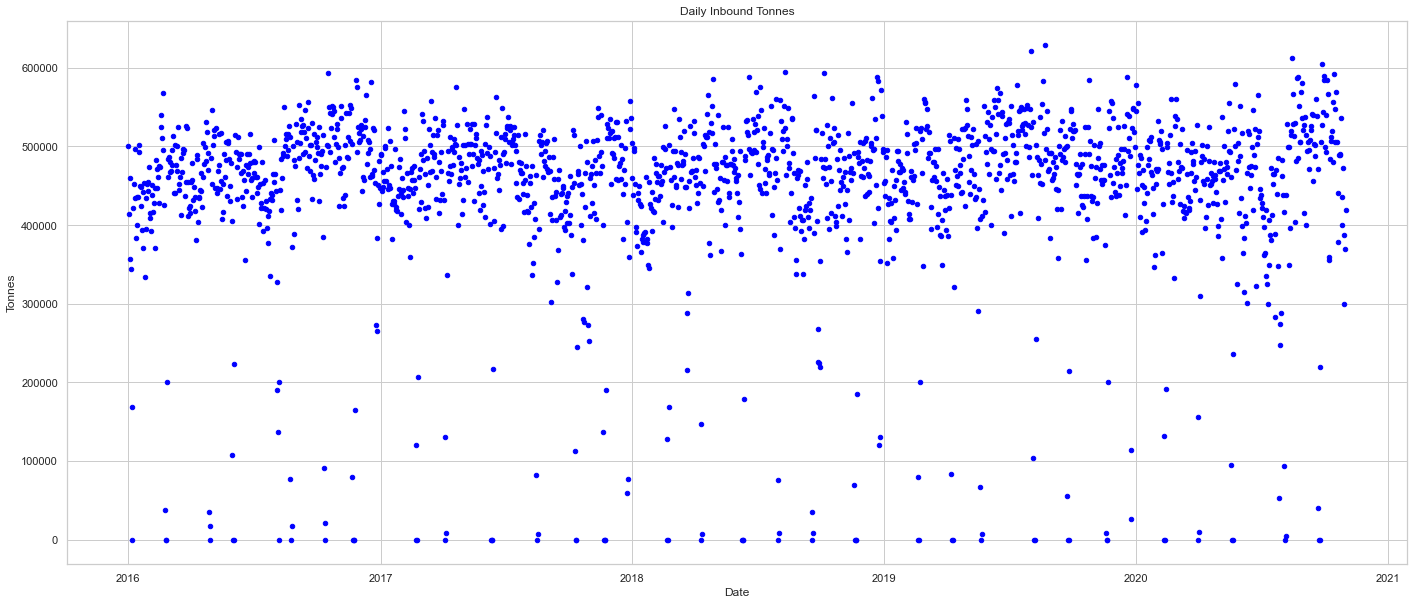

In [3]:
ax = dfInbound_tonnes.reset_index().plot(x='date',y='total_actualtonnes',kind='scatter',figsize=(24,10),color='blue',title='Daily Inbound Tonnes')
plt.setp(ax,ylabel='Tonnes',xlabel='Date')

Let's go for it, throw a linear regression at it, since eye balling it it looks like a straight line with alot of noise, we could get lunch eary today.

Score: 0.00059
intercept: 436530.74916 and coeff: 5.60336


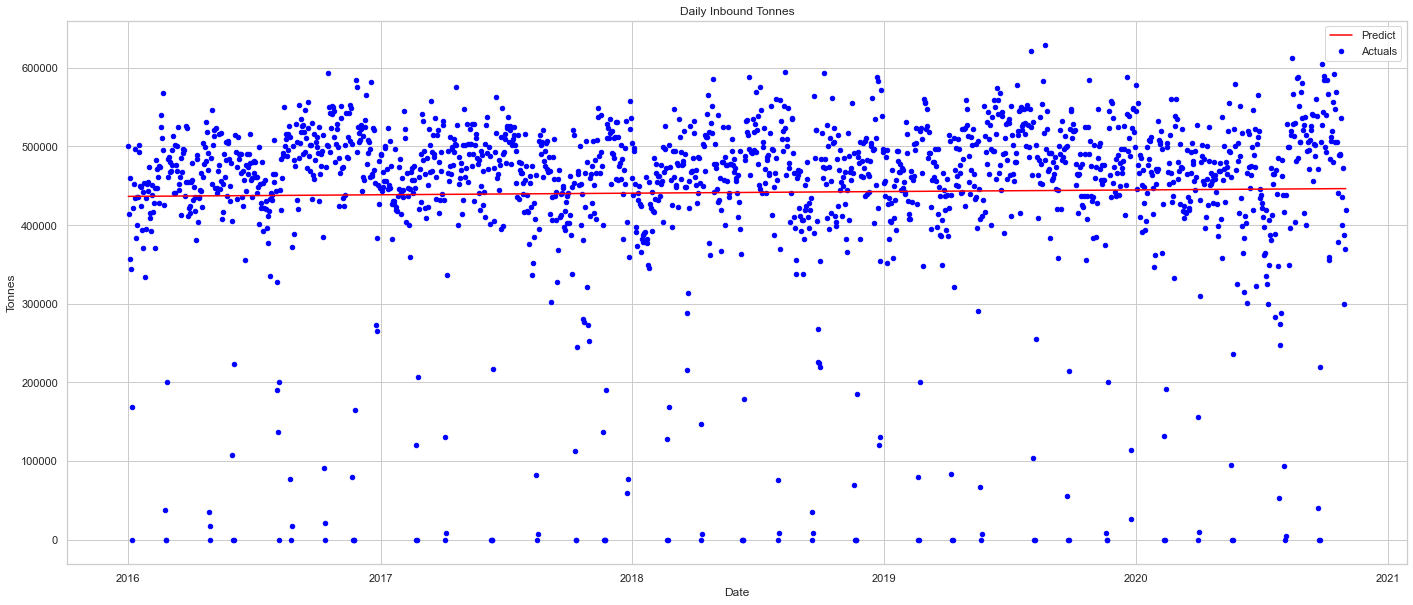

In [4]:
x = (dfInbound_tonnes.index - dfInbound_tonnes.index[0]).days.values.reshape(-1, 1)
y = dfInbound_tonnes.total_actualtonnes

reg = LinearRegression().fit(x, y)
print('Score: {:.5f}'.format(reg.score(x, y)))
print('intercept: {:.5f} and coeff: {:.5f}'.format(reg.intercept_,reg.coef_[0]))
ax = dfInbound_tonnes.reset_index().plot(x='date',y='total_actualtonnes',kind='scatter',figsize=(24,10),color='blue',title='Daily Inbound Tonnes')
plt.setp(ax,ylabel='Tonnes',xlabel='Date')

ax.plot(dfInbound_tonnes.index,reg.predict(x),color='red',label='Predict')
plt.legend(['Predict','Actuals'])

So we have our automagically fitted regression line that Sklearn went to town on the data for and therefore we now have a formula for the previous as well as future values of this data series.

$y(x) =  5.60336\,x + 436530.75$

Wow, so if someone asks, what will be the daily value 3rd March, 2021?, we can confindently say, *well, according to my machine learning model it will be 447109.90 tonnes. Time for lunch.*

![The real world](img/crab-bite.jpg)

Someone from operations asks how accurate is this forecasted value?
![Skeptical](img/suspicious.jpg)

Weeelllll, we have an $R^2$ score of 0.00059, so if I quickly Google what the hell that means, I find alot of stuff saying words and numbers, so I keep Googling and eventually, before I go blind, someone, somewhere on a forum says that a value close to 0.0 means the regression disregards the input features and outputs the expected value of y. I'm shitting myself at this point and I'm sooo hungry, I keep Googling and find that the smart person on the forum meant to say the average value of y. So in plain speakinese, this model predicts the value of the mean or average of the entire data set for any date we give it.

![thinking](img/thinking.png)

You seemed to have answered the question with the statement, "*the accuracy is, it always predicts the same value, in this case, something very close to 436530.75 tonnes for each day.*"

WTF.....I thought I was using machine learning and it would create a model that fit the data and makes me seem like a rockstar so I can each crab for every meal......I may need to try eating something else.

This example provided a basic and I'm sure arguable scenario where we eye balled the data, it looks like a straight line and applied a machine learning model directly to the data and found we might as well have just said use the average value as the prediction for all future days. What a piece of shit, so what went wrong?

What if we used deep learning, neural networks created a platform that would collect more data and we plugged more features in and made it smarter, better, faster, stronger, well maybe not stronger or faster.

The reality is we would spend more time and effort trying to eat the crab without learning about the crab, just that we have a thing, we eye ball a knife and fork and then try to dig in and find our teeth break off.

The answer is to be alot more lazy by nature and find out if we should even bother with doing any work at all. I won't labour what this means, other than to say if the data is such that throwing model after model and engineering features and including more data and domain knowledge and tea leaves and as much crap as we can think of, and it still won't work, why bother in the first place, can't we find out if we have a chance at finding something that works, upfront?